https://wjddyd66.github.io/pytorch/Pytorch-AutoEncoder/
## AutoEncoder 실습
@yeji choi 2022.05.14

In [9]:
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from torchsummary import summary as summary_
from torch.autograd import Variable

In [2]:
batch_size = 1000
learning_rate = 0.0002
num_epoch = 5

In [3]:
trn_dataset = datasets.MNIST('./mnist_data/',
                             download=True,
                             train=True,
                             transform=transforms.ToTensor()) 

test_dataset = datasets.MNIST("./mnist_data/", 
                             download=True,
                             train=False,
                             transform= transforms.Compose([
                               transforms.ToTensor(),
                           ]))

In [4]:
trn_dataset,len(trn_dataset)

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../1104_DL_evaluation_CNN/mnist_data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 60000)

In [5]:
m=len(trn_dataset)
train_data, val_data = random_split(trn_dataset, [int(m-m*0.2), int(m*0.2)])

trn_loader = torch.utils.data.DataLoader(train_data,
                                         batch_size=batch_size,
                                         shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val_data,
                                         batch_size=batch_size,
                                         shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size=batch_size,
                                         shuffle=True, drop_last=True)
len(trn_loader)

48

type of one image <class 'torch.Tensor'>
size of one image :  torch.Size([1, 28, 28])
type of label :  <class 'int'>
label :  5


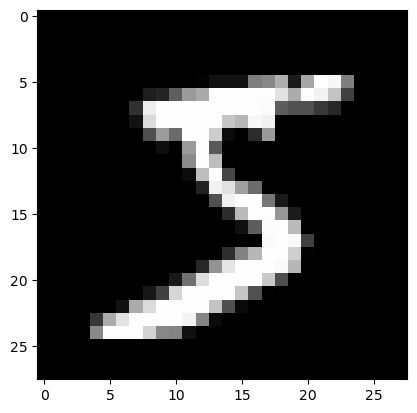

In [6]:
import torchvision
import matplotlib.pyplot as plt

one_image, label = trn_dataset[0]
print("type of one image", type(one_image))
print("size of one image : ", one_image.shape)
plt.imshow(one_image.squeeze().numpy(), cmap='gray')
print("type of label : ", type(label))
print("label : ", label)
plt.show()

In [42]:
class Autoencoder_Lin(nn.Module):
    def __init__(self):
        super(Autoencoder_Lin,self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28*28,200), 
                                     nn.Linear(200,20))
        self.decoder = nn.Sequential(nn.Linear(20,200),
                                     nn.Linear(200,28*28))   
                
    def forward(self,x):
        #print(x.shape)
        x = x.view(batch_size,-1)
        #print(x.shape)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size,1,28,28)
        return out

In [43]:
model = Autoencoder_Lin()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [44]:
print(model)

Autoencoder_Lin(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): Linear(in_features=200, out_features=20, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=200, bias=True)
    (1): Linear(in_features=200, out_features=784, bias=True)
  )
)


In [45]:
loss_arr =[]
for epoch in range(num_epoch):
    for i,[image,label] in enumerate(trn_loader):
        x = image
        #print(x.shape)
        #sys.exit(0)
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            val_loss = 0.0
            for j, [vimage,vlabel] in enumerate(val_loader):
                x=vimage
                v_out = model.forward(x)
                val_loss = loss_func(v_out, x)
        print("epoch: {}/{} | step: {}/{} | trn loss: {:.4f} | val loss: {:.4f}".format(
                epoch+1, num_epoch, i+1, len(trn_loader), loss / 100, val_loss / len(val_loader)
            ))
        loss_arr.append(loss.data.numpy())

epoch: 1/5 | step: 1/60 | trn loss: 0.0012 | val loss: 0.0121
epoch: 1/5 | step: 2/60 | trn loss: 0.0012 | val loss: 0.0118
epoch: 1/5 | step: 3/60 | trn loss: 0.0011 | val loss: 0.0116
epoch: 1/5 | step: 4/60 | trn loss: 0.0011 | val loss: 0.0113
epoch: 1/5 | step: 5/60 | trn loss: 0.0011 | val loss: 0.0115
epoch: 1/5 | step: 6/60 | trn loss: 0.0011 | val loss: 0.0110
epoch: 1/5 | step: 7/60 | trn loss: 0.0011 | val loss: 0.0109
epoch: 1/5 | step: 8/60 | trn loss: 0.0011 | val loss: 0.0108
epoch: 1/5 | step: 9/60 | trn loss: 0.0011 | val loss: 0.0107
epoch: 1/5 | step: 10/60 | trn loss: 0.0010 | val loss: 0.0105
epoch: 1/5 | step: 11/60 | trn loss: 0.0010 | val loss: 0.0102
epoch: 1/5 | step: 12/60 | trn loss: 0.0010 | val loss: 0.0102
epoch: 1/5 | step: 13/60 | trn loss: 0.0010 | val loss: 0.0099
epoch: 1/5 | step: 14/60 | trn loss: 0.0010 | val loss: 0.0099
epoch: 1/5 | step: 15/60 | trn loss: 0.0010 | val loss: 0.0095
epoch: 1/5 | step: 16/60 | trn loss: 0.0009 | val loss: 0.0095
e

torch.Size([1000, 28, 28])


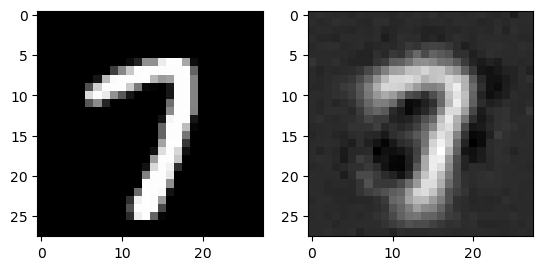

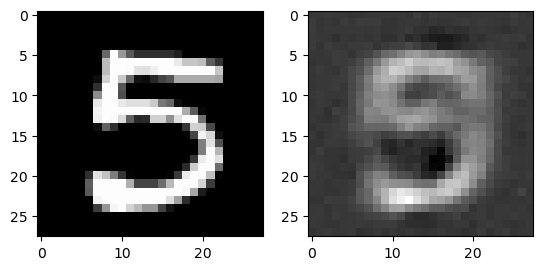

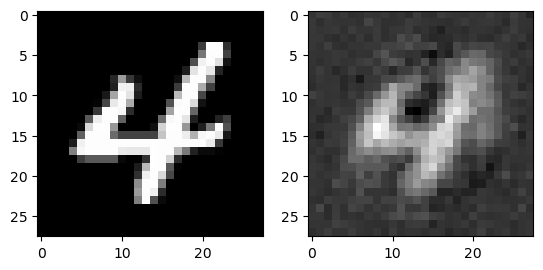

In [46]:
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(3):
    plt.subplot(1,2,1)
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

## CNN Autoencoder

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Sequential(
                        nn.Conv2d(1,16,3,padding=1),                            # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.Conv2d(16,32,3,padding=1),                           # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),                           # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2),                                       # batch x 64 x 14 x 14
                        nn.Conv2d(64,128,3,padding=1),                          # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),                         # batch x 64 x 7 x 7
                        nn.ReLU()
        )
        self.decoder = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),                    # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),                       # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.ConvTranspose2d(64,16,3,1,1),                        # batch x 16 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.ConvTranspose2d(16,1,3,2,1,1),                       # batch x 1 x 28 x 28
                        nn.ReLU()
        )
                
    def forward(self,x):
        out = self.encoder(x)
        #print(out.shape)
        #out = out.view(batch_size, -1)
        out = self.decoder(out)
        return out

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),                    # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),                       # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,16,3,1,1),                        # batch x 16 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.ConvTranspose2d(16,1,3,2,1,1),                       # batch x 1 x 28 x 28
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

In [20]:
AE = Autoencoder()

# 인코더 디코더의 파라미터를 동시에 학습시키기 위해 이를 묶는 방법입니다.
parameters = list(AE.encoder.parameters())+ list(AE.decoder.parameters())

learning_rate = 0.001

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [21]:
best_loss=999
for epoch in range(num_epoch):
    for i,[image,label] in enumerate(trn_loader):
        optimizer.zero_grad()
        print(image.shape)      
        output = AE(image)
        #output = decoder(output)
        
        loss = loss_func(output,image)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            val_loss = 0.0
            for j, [vimage,vlabel] in enumerate(val_loader):
                
                v_out = AE(vimage)
                #v_out = decoder(v_out)
                val_loss = loss_func(v_out, vimage)
        print("epoch: {}/{} | step: {}/{} | trn loss: {:.4f} | val loss: {:.4f}".format(
                epoch+1, num_epoch, i+1, len(trn_loader), loss / len(trn_loader), val_loss / len(val_loader)
            ))    
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(AE.state_dict(),'conv_autoencoder.pkl')
        #print(loss)

torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 1/48 | trn loss: 0.0082 | val loss: 0.0419
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 2/48 | trn loss: 0.0105 | val loss: 0.0139
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 3/48 | trn loss: 0.0034 | val loss: 0.0108
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 4/48 | trn loss: 0.0027 | val loss: 0.0096
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 5/48 | trn loss: 0.0024 | val loss: 0.0087
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 6/48 | trn loss: 0.0022 | val loss: 0.0082
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 7/48 | trn loss: 0.0020 | val loss: 0.0077
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 8/48 | trn loss: 0.0020 | val loss: 0.0076
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 9/48 | trn loss: 0.0019 | val loss: 0.0073
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 10/48 | trn loss: 0.0018 | val loss: 0.0070
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 11/48 | trn loss: 0.0018 | val

torch.Size([1000, 28, 28])


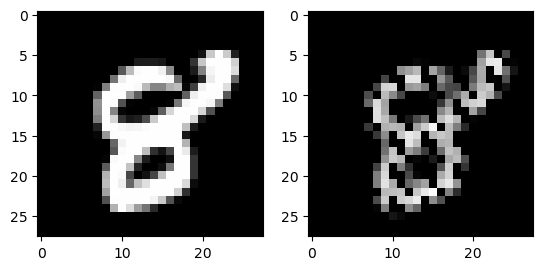

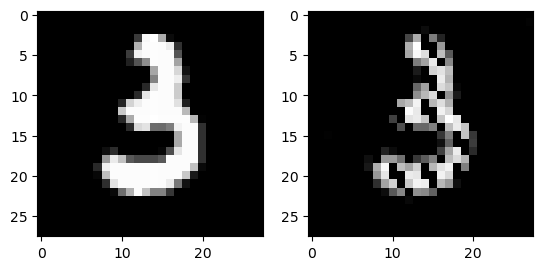

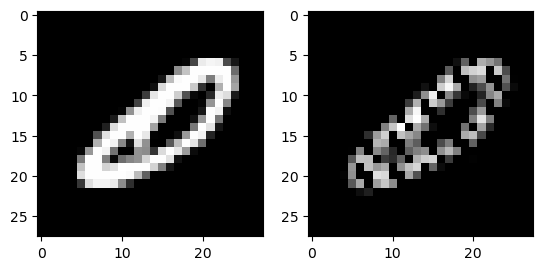

In [22]:
out_img = torch.squeeze(v_out.data)
print(out_img.size())

for i in range(3):
    plt.subplot(1,2,1)
    plt.imshow(torch.squeeze(vimage[i]).numpy(),cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [24]:
model = Autoencoder()
model.load_state_dict(torch.load('./conv_autoencoder.pkl'))

<All keys matched successfully>

In [25]:
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding

torch.Size([1000, 28, 28])


/scratch/x2093a01/.conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/scratch/x2093a01/.conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


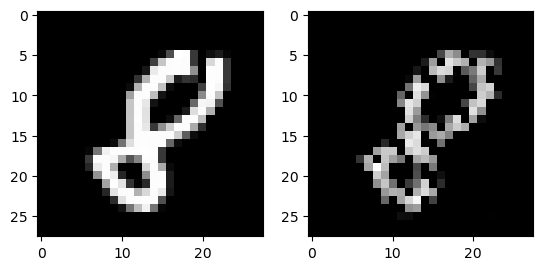

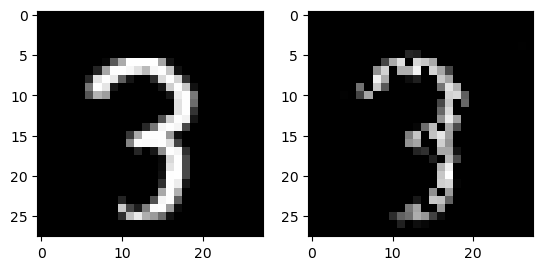

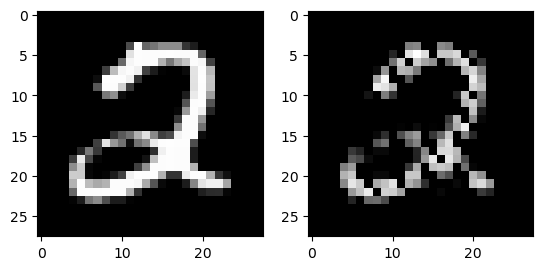

SystemExit: 

In [29]:
model.eval()
for j, [image,label] in enumerate(test_loader):        
    v_out = model(image)
    out_img = torch.squeeze(v_out.data)
    print(out_img.size())

    for i in range(3):
        plt.subplot(1,2,1)
        plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
        plt.subplot(1,2,2)
        plt.imshow(out_img[i].numpy(),cmap='gray')
        plt.show()
    sys.exit()

## Noise Reduction Autoencoder

type of one image <class 'torch.Tensor'>
size of one image :  torch.Size([1, 28, 28])
type of label :  <class 'int'>
label :  5


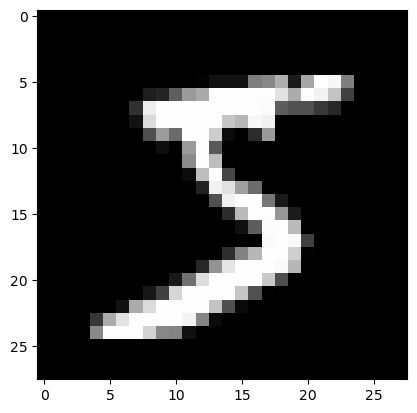

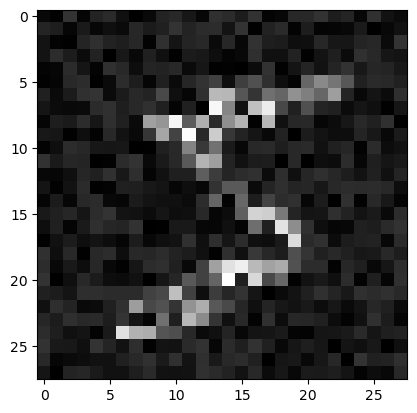

In [35]:
noise=torch.rand(1,28,28)
one_image, label = trn_dataset[0]
print("type of one image", type(one_image))
print("size of one image : ", one_image.shape)
plt.imshow(one_image.squeeze().numpy(), cmap='gray')
print("type of label : ", type(label))
print("label : ", label)
plt.show()
one_image_n=torch.mul(one_image+0.25,0.1*noise)
plt.imshow(one_image_n.squeeze().numpy(), cmap='gray')
plt.show()

In [18]:
DN_AE = Autoencoder()

# 인코더 디코더의 파라미터를 동시에 학습시키기 위해 이를 묶는 방법입니다.
parameters = list(DN_AE.encoder.parameters())+ list(DN_AE.decoder.parameters())

learning_rate = 0.001

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [19]:
best_loss=999
noise=torch.rand(batch_size,1,28,28)

for epoch in range(num_epoch):
    for i,[image,label] in enumerate(trn_loader):
        image_n=torch.mul(image+0.25,0.1*noise)
        image_n=Variable(image_n)
        optimizer.zero_grad()
        print(image.shape)      
        output = DN_AE(image_n)
        #output = decoder(output)
        
        loss = loss_func(output,image)
        loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            val_loss = 0.0
            for j, [vimage,vlabel] in enumerate(val_loader):
                
                v_out = DN_AE(vimage)
                #v_out = decoder(v_out)
                val_loss = loss_func(v_out, vimage)
        print("epoch: {}/{} | step: {}/{} | trn loss: {:.4f} | val loss: {:.4f}".format(
                epoch+1, num_epoch, i+1, len(trn_loader), loss / len(trn_loader), val_loss / len(val_loader)
            ))    
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(DN_AE.state_dict(),'denoisting_conv_autoencoder.pkl')
        #print(loss)

torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 1/48 | trn loss: 0.0240 | val loss: 0.1102
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 2/48 | trn loss: 0.0266 | val loss: 0.0658
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 3/48 | trn loss: 0.0160 | val loss: 0.0467
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 4/48 | trn loss: 0.0113 | val loss: 0.0355
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 5/48 | trn loss: 0.0086 | val loss: 0.0272
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 6/48 | trn loss: 0.0066 | val loss: 0.0216
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 7/48 | trn loss: 0.0053 | val loss: 0.0179
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 8/48 | trn loss: 0.0044 | val loss: 0.0156
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 9/48 | trn loss: 0.0038 | val loss: 0.0144
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 10/48 | trn loss: 0.0035 | val loss: 0.0134
torch.Size([1000, 1, 28, 28])
epoch: 1/5 | step: 11/48 | trn loss: 0.0033 | val

torch.Size([1000, 28, 28])


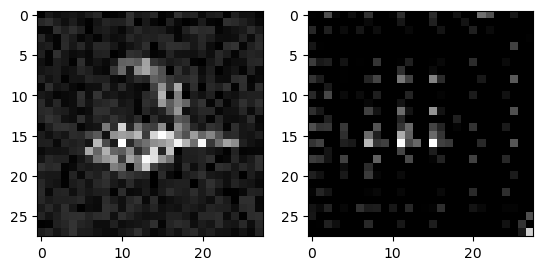

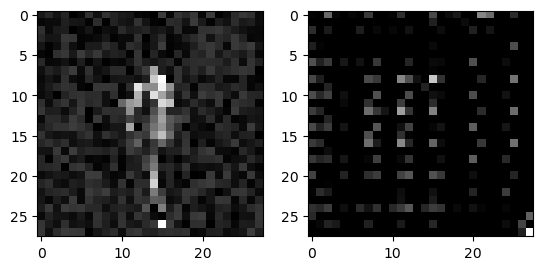

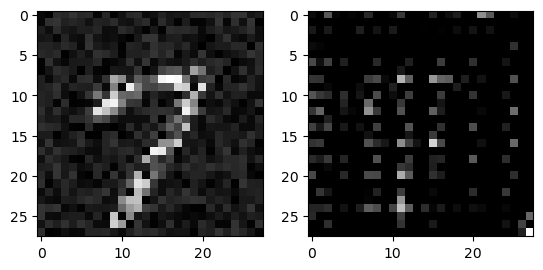

SystemExit: 

In [20]:
test_model =  Autoencoder()
test_model.load_state_dict(torch.load('denoisting_conv_autoencoder.pkl'))
test_model.eval()

noise=torch.rand(batch_size,1,28,28)
for j, [image,label] in enumerate(trn_loader):  
    image_n=torch.mul(image+0.25,0.1*noise)
    image_n=Variable(image_n)
    v_out = test_model(image_n)
    out_img = torch.squeeze(v_out.data)
    print(out_img.size())

    for i in range(3):
        plt.subplot(1,2,1)
        plt.imshow(torch.squeeze(image_n[i]).numpy(),cmap='gray')
        plt.subplot(1,2,2)
        plt.imshow(out_img[i].numpy(),cmap='gray')
        plt.show()
    sys.exit()